In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,f1_score
from sklearn.metrics import roc_auc_score,roc_curve,auc

In [3]:
data=pd.read_csv("/home/roopesh/Documents/Final_csv_prob/prob+label.csv")

In [4]:
data

,Idx_csv,Iris_Color,Prob_R_pix,Prob_G_pix,Prob_B_pix,Prob_3rdComp
0,0,Black,4.234593e-02,1.456984e-04,0.957508,3.979530e-49
1,0,Black,1.200414e-01,3.081550e-04,0.879650,5.013804e-80
2,0,Black,2.324060e-02,3.633050e-06,0.976756,3.866560e-48
3,0,Black,2.203044e-02,3.531491e-06,0.977966,3.936263e-36
4,0,Black,2.054063e-02,6.655337e-06,0.979453,9.467966e-48
...,...,...,...,...,...,...
17315,123,Black,8.280721e-01,5.786239e-65,0.171928,2.170424e-189
17316,123,Black,2.986820e-01,2.995201e-58,0.701318,1.150260e-172
17317,123,Black,3.429421e-12,1.286990e-100,1.000000,6.848881e-147
17318,123,Black,4.856492e-07,8.291815e-97,1.000000,4.375624e-96


In [5]:
# data=data.replace([np.inf,-np.inf],np.nan,inplace=True)

In [6]:
data1=data.dropna(inplace=True)

In [7]:
data.isna()

,Idx_csv,Iris_Color,Prob_R_pix,Prob_G_pix,Prob_B_pix,Prob_3rdComp
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
17315,False,False,False,False,False,False
17316,False,False,False,False,False,False
17317,False,False,False,False,False,False
17318,False,False,False,False,False,False


In [8]:
data.isna().sum()

Idx_csv         0
Iris_Color      0
Prob_R_pix      0
Prob_G_pix      0
Prob_B_pix      0
Prob_3rdComp    0
dtype: int64

In [9]:
# data.set_index('Idx_csv')

In [10]:
group=data.groupby('Idx_csv')

In [11]:
d= group.first()
d

,Iris_Color,Prob_R_pix,Prob_G_pix,Prob_B_pix,Prob_3rdComp
Idx_csv,,,,,
0,Black,4.234593e-02,1.456984e-04,9.575084e-01,3.979530e-49
1,Dark_Brown,6.156053e-01,3.464212e-01,3.797324e-02,2.653332e-07
2,Black,1.251486e-26,9.808826e-01,1.911741e-02,4.979418e-48
3,Dark_Brown,6.785541e-11,1.473968e-01,6.780319e-02,7.848000e-01
4,Dark_Brown,6.481893e-01,1.488407e-01,1.958131e-01,7.156914e-03
...,...,...,...,...,...
119,Dark_Brown,1.585398e-01,1.024030e-02,8.312199e-01,6.009563e-13
120,Black,4.725030e-10,9.999822e-01,1.779010e-05,1.212941e-42
121,Black,9.736464e-01,5.214426e-18,2.635356e-02,4.878453e-94


In [12]:
group2=data.groupby(['Idx_csv','Iris_Color'])

In [13]:
group2.first()

,,Prob_R_pix,Prob_G_pix,Prob_B_pix,Prob_3rdComp
Idx_csv,Iris_Color,,,,
0,Black,4.234593e-02,1.456984e-04,9.575084e-01,3.979530e-49
1,Dark_Brown,6.156053e-01,3.464212e-01,3.797324e-02,2.653332e-07
2,Black,1.251486e-26,9.808826e-01,1.911741e-02,4.979418e-48
3,Dark_Brown,6.785541e-11,1.473968e-01,6.780319e-02,7.848000e-01
4,Dark_Brown,6.481893e-01,1.488407e-01,1.958131e-01,7.156914e-03
...,...,...,...,...,...
119,Dark_Brown,1.585398e-01,1.024030e-02,8.312199e-01,6.009563e-13
120,Black,4.725030e-10,9.999822e-01,1.779010e-05,1.212941e-42
121,Black,9.736464e-01,5.214426e-18,2.635356e-02,4.878453e-94


In [14]:
print(d['Iris_Color'].unique())
d['Iris_Color'].nunique()

['Black' 'Dark_Brown' 'Light_Brown' 'Medium_Brown' 'Grey']


5

In [15]:

x= data[['Prob_R_pix','Prob_G_pix','Prob_B_pix','Prob_3rdComp']]
# #x= data[['GMM_cluster']]

In [16]:
# x= d[['GMM_cluster']]

In [17]:
# x.set_index('Idx_csv')

In [18]:
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
# data['Iris_Color']= le.fit_transform(data['Iris_Color'])

In [19]:
# data['Iris_Color'].unique()

In [20]:
y=data[['Iris_Color']]

In [21]:
# y.set_index('Idx_csv')

In [22]:
# y=d[['Iris_Color']]

In [23]:
y.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17320 entries, 0 to 17319
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Iris_Color  17320 non-null  object
dtypes: object(1)
memory usage: 270.6+ KB


In [24]:
x=x.astype(np.float32)
# y=y.astype(np.int32)

In [25]:
x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17320 entries, 0 to 17319
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Prob_R_pix    17320 non-null  float32
 1   Prob_G_pix    17320 non-null  float32
 2   Prob_B_pix    17320 non-null  float32
 3   Prob_3rdComp  17320 non-null  float32
dtypes: float32(4)
memory usage: 405.9 KB


In [26]:
y.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17320 entries, 0 to 17319
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Iris_Color  17320 non-null  object
dtypes: object(1)
memory usage: 270.6+ KB


In [27]:
x1_train, x1_test, y1_train, y1_test = train_test_split(x,y,test_size=0.20, shuffle= True)
print("X1-Train Shape: ", x1_train.shape,'\n' "Y1-Train Shape(Dependent):", y1_train.shape)
print("X1-Test Shape: ", x1_test.shape,'\n' "Y1-Test Shape(Dependent):", y1_test.shape)

X1-Train Shape:  (13856, 4) 
Y1-Train Shape(Dependent): (13856, 1)
X1-Test Shape:  (3464, 4) 
Y1-Test Shape(Dependent): (3464, 1)


In [28]:
# list(x1_train.columns)

In [29]:
# Normalizing the dataset 
from sklearn.preprocessing import StandardScaler 
scaler = StandardScaler() 
scaler.fit(x1_train) 
scaler.fit(x1_test)
x1_train = scaler.transform(x1_train) 
x1_test = scaler.transform(x1_test)

In [30]:
x1_test

array([[-0.6716308 , -0.68979776,  1.9815315 , -0.5232391 ],
       [-0.6720393 , -0.68979776, -0.1474823 ,  1.7307074 ],
       [-0.6720393 , -0.6897977 , -0.5770151 ,  2.1853507 ],
       ...,
       [-0.6720393 ,  1.6429355 , -0.57726824, -0.52316386],
       [-0.6720393 , -0.68979776, -0.5662637 ,  2.1739707 ],
       [ 1.3385432 , -0.35014138, -0.57726824, -0.5232391 ]],
      dtype=float32)

In [31]:
x1_train

array([[ 1.6377611 , -0.68979776, -0.53005713, -0.5232391 ],
       [-0.641936  ,  1.6129845 , -0.57726824, -0.5230374 ],
       [ 1.4208289 , -0.58965534, -0.40399483, -0.5232391 ],
       ...,
       [-0.6720393 , -0.6350604 ,  0.05747202,  1.4502102 ],
       [-0.6720393 ,  1.5907197 , -0.5199127 , -0.5232391 ],
       [-0.67167306, -0.6247028 , -0.57726824,  2.1096087 ]],
      dtype=float32)

In [32]:
y1_train

,Iris_Color
6836,Dark_Brown
8273,Medium_Brown
3534,Black
1359,Grey
12284,Dark_Brown
...,...
4177,Medium_Brown
3895,Light_Brown
11805,Grey
346,Black


In [33]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

In [34]:
model1 = LogisticRegression(solver='saga', dual=False, tol=0.0001,fit_intercept=1, C=100.0, penalty='elasticnet',max_iter=800, l1_ratio=0, random_state=60)
model1.fit(x1_train, y1_train)
lr_predict= model1.predict(x1_test)
print(classification_report(y1_test, lr_predict))
print(confusion_matrix(y1_test, lr_predict))
acc = accuracy_score(y1_test, lr_predict)
acc

/home/roopesh/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


              precision    recall  f1-score   support

       Black       0.48      1.00      0.65      1652
  Dark_Brown       0.00      0.00      0.00       893
        Grey       0.00      0.00      0.00       233
 Light_Brown       0.00      0.00      0.00       275
Medium_Brown       0.00      0.00      0.00       411

    accuracy                           0.48      3464
   macro avg       0.10      0.20      0.13      3464
weighted avg       0.23      0.48      0.31      3464

[[1652    0    0    0    0]
 [ 893    0    0    0    0]
 [ 233    0    0    0    0]
 [ 275    0    0    0    0]
 [ 411    0    0    0    0]]


/home/roopesh/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/roopesh/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/roopesh/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.476905311778291

In [35]:
rfc = RandomForestClassifier(n_estimators=250, max_depth=40, min_samples_split=15, min_samples_leaf=5)
rfc.fit(x1_train, y1_train)
pred_rfc = rfc.predict(x1_test)
print(classification_report(y1_test, pred_rfc))
accuracy_score(y1_test, pred_rfc)

/home/roopesh/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


              precision    recall  f1-score   support

       Black       0.60      0.83      0.70      1652
  Dark_Brown       0.60      0.47      0.53       893
        Grey       0.49      0.21      0.29       233
 Light_Brown       0.49      0.20      0.29       275
Medium_Brown       0.50      0.34      0.40       411

    accuracy                           0.59      3464
   macro avg       0.54      0.41      0.44      3464
weighted avg       0.57      0.59      0.56      3464



0.5857390300230947

[[1370  162   22   25   73]
 [ 412  416   12   19   34]
 [ 131   35   48    5   14]
 [ 167   31    3   56   18]
 [ 204   47   12    9  139]]


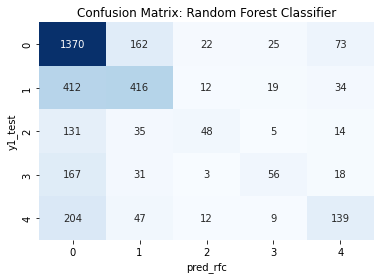

In [36]:
#Confusion Matrix
cm = confusion_matrix(y1_test,pred_rfc)
print(cm)

sns.heatmap(cm,cbar=False,annot=True,cmap='Blues',fmt="d")
plt.xlabel("pred_rfc")
plt.ylabel("y1_test")
plt.title("Confusion Matrix: Random Forest Classifier")
plt.show()

In [37]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

classifier = KNeighborsClassifier(n_neighbors=28)
classifier.fit(x1_train,y1_train)

kn_predict =classifier.predict(x1_test)
print("Knn-First Model:",metrics.accuracy_score(y1_test,kn_predict))

print(confusion_matrix(y1_test,kn_predict))
print(classification_report(y1_test,kn_predict))

Knn-First Model: 0.4942263279445728
[[1396  159   14   20   63]
 [ 643  188    5   15   42]
 [ 161   37   20    3   12]
 [ 222   22    0   19   12]
 [ 251   65    4    2   89]]
              precision    recall  f1-score   support

       Black       0.52      0.85      0.65      1652
  Dark_Brown       0.40      0.21      0.28       893
        Grey       0.47      0.09      0.14       233
 Light_Brown       0.32      0.07      0.11       275
Medium_Brown       0.41      0.22      0.28       411

    accuracy                           0.49      3464
   macro avg       0.42      0.29      0.29      3464
weighted avg       0.46      0.49      0.43      3464



/home/roopesh/anaconda3/lib/python3.7/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [38]:
error = []   
# Calculating error for K values between 1 and 40 
for i in range(1, 40): 
    knn = KNeighborsClassifier(n_neighbors=i) 
    knn.fit(x1_train, y1_train) 
    pred_i = knn.predict(x1_test) 
#     error.append(np.mean(pred_i != y1_test))
    print("Accuracy Score, when K= ",i,":",metrics.accuracy_score(y1_test,pred_i))
    
print("Best K value is 5 ")
    
# plt.figure(figsize=(12, 6)) 
# plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o', markerfacecolor='blue', markersize=10) 
# plt.title('Error Rate Vs K-Value from 1 to 40') 
# plt.xlabel('K Value') 
# plt.ylabel('Mean Error')   

/home/roopesh/anaconda3/lib/python3.7/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Accuracy Score, when K=  1 : 0.437933025404157


/home/roopesh/anaconda3/lib/python3.7/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/home/roopesh/anaconda3/lib/python3.7/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Accuracy Score, when K=  2 : 0.4780600461893764
Accuracy Score, when K=  3 : 0.4714203233256351


/home/roopesh/anaconda3/lib/python3.7/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Accuracy Score, when K=  4 : 0.4668013856812933


/home/roopesh/anaconda3/lib/python3.7/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/home/roopesh/anaconda3/lib/python3.7/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Accuracy Score, when K=  5 : 0.4696882217090069
Accuracy Score, when K=  6 : 0.47950346420323325


/home/roopesh/anaconda3/lib/python3.7/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Accuracy Score, when K=  7 : 0.48267898383371827


/home/roopesh/anaconda3/lib/python3.7/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/home/roopesh/anaconda3/lib/python3.7/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Accuracy Score, when K=  8 : 0.47748267898383373
Accuracy Score, when K=  9 : 0.4809468822170901


/home/roopesh/anaconda3/lib/python3.7/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Accuracy Score, when K=  10 : 0.48123556581986143


/home/roopesh/anaconda3/lib/python3.7/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/home/roopesh/anaconda3/lib/python3.7/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Accuracy Score, when K=  11 : 0.4896073903002309
Accuracy Score, when K=  12 : 0.4913394919168591


/home/roopesh/anaconda3/lib/python3.7/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Accuracy Score, when K=  13 : 0.48874133949191684


/home/roopesh/anaconda3/lib/python3.7/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/home/roopesh/anaconda3/lib/python3.7/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Accuracy Score, when K=  14 : 0.4893187066974596
Accuracy Score, when K=  15 : 0.4953810623556582


/home/roopesh/anaconda3/lib/python3.7/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Accuracy Score, when K=  16 : 0.4867205542725173


/home/roopesh/anaconda3/lib/python3.7/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/home/roopesh/anaconda3/lib/python3.7/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Accuracy Score, when K=  17 : 0.4867205542725173
Accuracy Score, when K=  18 : 0.48267898383371827


/home/roopesh/anaconda3/lib/python3.7/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Accuracy Score, when K=  19 : 0.4846997690531178


/home/roopesh/anaconda3/lib/python3.7/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/home/roopesh/anaconda3/lib/python3.7/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Accuracy Score, when K=  20 : 0.4884526558891455
Accuracy Score, when K=  21 : 0.4855658198614319


/home/roopesh/anaconda3/lib/python3.7/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Accuracy Score, when K=  22 : 0.4884526558891455


/home/roopesh/anaconda3/lib/python3.7/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/home/roopesh/anaconda3/lib/python3.7/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Accuracy Score, when K=  23 : 0.4913394919168591
Accuracy Score, when K=  24 : 0.49105080831408776


/home/roopesh/anaconda3/lib/python3.7/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Accuracy Score, when K=  25 : 0.4907621247113164


/home/roopesh/anaconda3/lib/python3.7/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/home/roopesh/anaconda3/lib/python3.7/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Accuracy Score, when K=  26 : 0.49278290993071594
Accuracy Score, when K=  27 : 0.49278290993071594


/home/roopesh/anaconda3/lib/python3.7/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Accuracy Score, when K=  28 : 0.4942263279445728


/home/roopesh/anaconda3/lib/python3.7/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/home/roopesh/anaconda3/lib/python3.7/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Accuracy Score, when K=  29 : 0.49653579676674364
Accuracy Score, when K=  30 : 0.4939376443418014


/home/roopesh/anaconda3/lib/python3.7/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Accuracy Score, when K=  31 : 0.4962471131639723


/home/roopesh/anaconda3/lib/python3.7/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/home/roopesh/anaconda3/lib/python3.7/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Accuracy Score, when K=  32 : 0.4945150115473441
Accuracy Score, when K=  33 : 0.4976905311778291


/home/roopesh/anaconda3/lib/python3.7/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/home/roopesh/anaconda3/lib/python3.7/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Accuracy Score, when K=  34 : 0.49653579676674364
Accuracy Score, when K=  35 : 0.4930715935334873


/home/roopesh/anaconda3/lib/python3.7/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/home/roopesh/anaconda3/lib/python3.7/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Accuracy Score, when K=  36 : 0.49740184757505773
Accuracy Score, when K=  37 : 0.4930715935334873
Accuracy Score, when K=  38 : 0.49364896073903003


/home/roopesh/anaconda3/lib/python3.7/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/home/roopesh/anaconda3/lib/python3.7/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Accuracy Score, when K=  39 : 0.4924942263279446
Best K value is 5 


In [39]:
#AdaBoost 
from sklearn.ensemble import AdaBoostClassifier
adboost = AdaBoostClassifier(n_estimators =50, random_state=1)
adboost.fit(x1_train, y1_train)
y_pred_adboost = adboost.predict(x1_test)
print(classification_report(y1_test, y_pred_adboost))
print("Accuarcy :", accuracy_score(y1_test, y_pred_adboost))

/home/roopesh/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


              precision    recall  f1-score   support

       Black       0.49      0.94      0.65      1652
  Dark_Brown       0.41      0.06      0.11       893
        Grey       0.20      0.08      0.12       233
 Light_Brown       0.00      0.00      0.00       275
Medium_Brown       0.45      0.06      0.10       411

    accuracy                           0.48      3464
   macro avg       0.31      0.23      0.20      3464
weighted avg       0.41      0.48      0.36      3464

Accuarcy : 0.47950346420323325


/home/roopesh/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/roopesh/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/roopesh/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [40]:
final = pd.DataFrame({'MODELS': ["Logistic Regression","Random Forest","KNN","AdaBoost"],
'ACCURACY': [accuracy_score(y1_test, lr_predict),accuracy_score(y1_test, pred_rfc),metrics.accuracy_score(y1_test,kn_predict), accuracy_score(y1_test, y_pred_adboost) ]})

In [41]:
end= final.sort_values(by='ACCURACY', ascending=False)
end_all = end.set_index('ACCURACY')
end_all

,MODELS
ACCURACY,
0.585739,Random Forest
0.494226,KNN
0.479503,AdaBoost
0.476905,Logistic Regression


In [42]:
y1_test

,Iris_Color
7767,Black
13826,Black
3803,Black
5802,Light_Brown
216,Dark_Brown
...,...
166,Dark_Brown
12965,Black
2784,Grey
249,Dark_Brown


In [43]:
# submission_result = pd.DataFrame({'data': y1_test, 'Predicted':pred_rfc})
# submission_result

In [44]:
pred_rfc

array(['Dark_Brown', 'Black', 'Dark_Brown', ..., 'Grey', 'Dark_Brown',
       'Black'], dtype=object)